<a href="https://colab.research.google.com/github/farima-trb/R/blob/main/project(part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
data=read.csv("/content/Atlas_Khodro.csv",header = T)
head(data)

,Time_On_Line,Number_Accepting_Insurance,Complaints_per_20_Customers,Wait_Time_for_Bus,Gas_To_Fill,Time_On_Line_Improved
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,20.14,160,0,-4.36,65.25,11.160
2,14.97,174,1,-3.75,9.75,10.203
3,9.72,156,1,-1.75,32.25,11.127
4,14.65,146,3,-1.13,14.00,13.068
5,12.81,146,2,-1.36,12.25,11.004
6,19.90,170,2,-2.78,7.50,12.936


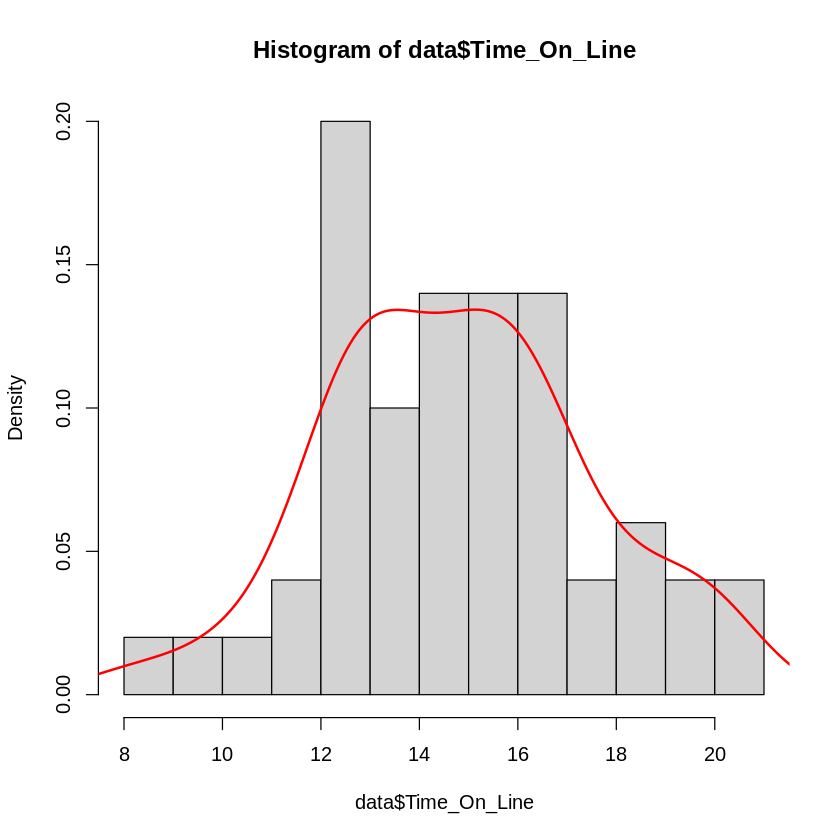

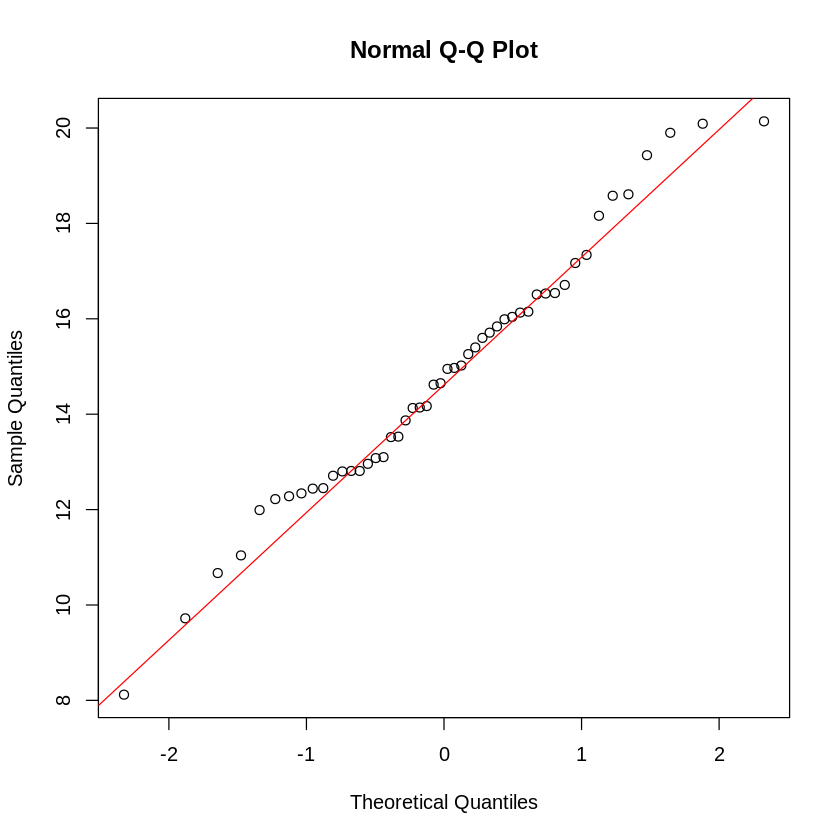

In [8]:
#Q1
hist(data$Time_On_Line,freq = F,breaks = 15)
lines(density(data$Time_On_Line),col = "red",lwd = 2)

qqnorm(data$Time_On_Line)
qqline(data$Time_On_Line,col="red")

In [9]:
#shapiro test
shapiro.test(data$Time_On_Line)


	Shapiro-Wilk normality test

data:  data$Time_On_Line
W = 0.98199, p-value = 0.6386


In [10]:
# p-value > 0.05 --> normal distribution --> T

In [11]:
# Skewness and Kurtosis test

install.packages("moments")
library(moments)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
jarque.test(data$Time_On_Line)


	Jarque-Bera Normality Test

data:  data$Time_On_Line
JB = 0.095754, p-value = 0.9533
alternative hypothesis: greater


In [13]:
# p-value > 0.05 --> normal distribution --> T

In [14]:
#Anscombe-Glynn test

anscombe.test(data$Time_On_Line)


	Anscombe-Glynn kurtosis test

data:  data$Time_On_Line
kurt = 2.83100, z = 0.12428, p-value = 0.9011
alternative hypothesis: kurtosis is not equal to 3


In [15]:
# p-value > 0.05 --> normal distribution --> T

In [16]:
#Q2

#point estimation of mean
mean_t=mean(data$Time_On_Line)
cat("point estimation =",round(mean_t,4),"\n")

#interval estimation of Mean with Unkown variance
#confidence interval=0.95
n=length(data$Time_On_Line)
sd_t=sd(data$Time_On_Line)
alpha=0.05
t=qt(alpha/2,n-1)

lower_mean = mean_t - (abs(t) * sd_t / sqrt(n))
upper_mean = mean_t + (abs(t) * sd_t / sqrt(n))

cat("interval estimation =","[",round(lower_mean,4),",",round(upper_mean,4),"]")

point estimation = 14.7788 
interval estimation = [ 14.0202 , 15.5374 ]

In [17]:
#Q3

count15=0
for (x in data$Time_On_Line){
  if(x>15){
    count15=count15+1
  }
}
cat("percentage of values more than 15 = ",count15/length(data$Time_On_Line)*100,"%\n")

#OR
cat("percentage of values more than 15 = ",
    round(pnorm(15, mean(data$Time_On_Line), sd(data$Time_On_Line), lower.tail = FALSE)*100,4),"%")


percentage of values more than 15 =  46 %
percentage of values more than 15 =  46.6976 %

In [18]:
#Q4
sum_Insurance=0
for (x in data$Number_Accepting_Insurance){
  if(!is.na(x)){
    sum_Insurance=sum_Insurance+x
  }
}
cat("percentage of people whose insurance is accepted = ",(sum_Insurance/(250*30))*100)

percentage of people whose insurance is accepted =  61.12

In [19]:
#Q5
p5=sum_Insurance/(250*30)
nq5=2
p5
cat("P(X=2) =",round(dbinom(2,nq5,p5),4),"\n")

cat("----------------------------------------------------\n")

#Q6
nq6=10
cat("P(X>=5) =",round(pbinom(4,nq6,p5,lower.tail = F),4),"\n")

[1] 0.6112

P(X=2) = 0.3736 
----------------------------------------------------
P(X>=5) = 0.8519 


In [50]:
#Q8

#20 customers problem
mean_Complaints=sum(data$Complaints_per_20_Customers[1:25])/25
mean_Complaints

cat("P(X=4) =",round(dpois(4,mean_Complaints),4),"\n")

cat("----------------------------------------------------\n")

#Q9
cat("P(X>4) = P(X>=5) =",round(ppois(4,mean_Complaints, lower.tail = F),4),"\n")

cat("----------------------------------------------------\n")

#Q10
#poisson test
poisson.test(x=sum(data$Complaints_per_20_Customers[1:25]),T=25)


[1] 0.96

P(X=4) = 0.0136 
----------------------------------------------------
P(X>4) = P(X>=5) = 0.0031 
----------------------------------------------------



	Exact Poisson test

data:  sum(data$Complaints_per_20_Customers[1:25]) time base: 25
number of events = 24, time base = 25, p-value = 1
alternative hypothesis: true event rate is not equal to 1
95 percent confidence interval:
 0.6150901 1.4284039
sample estimates:
event rate 
      0.96 


In [21]:
#Q11

#point estimation of Mean
sum_tBus=0
for (x in data$Wait_Time_for_Bus){
  sum_tBus=sum_tBus+ (x+10)
}
mean_tBus=sum_tBus/50
cat("point estimation =",round(mean_tBus,4),"\n")

#interval estimation of Mean with Unkown variance
#confidence interval=0.95
n_tBus=length(data$Wait_Time_for_Bus)
sd_tBus=sd(data$Wait_Time_for_Bus)
alpha=0.05
t11=qt(alpha/2,n_tBus-1)

lower_mean11 = mean_tBus - (abs(t11) * sd_t / sqrt(n_tBus))
upper_mean11 = mean_tBus + (abs(t11) * sd_t / sqrt(n_tBus))

cat("interval estimation =","[",round(lower_mean11,4),",",round(upper_mean11,4),"]")

point estimation = 9.2898 
interval estimation = [ 8.5312 , 10.0484 ]

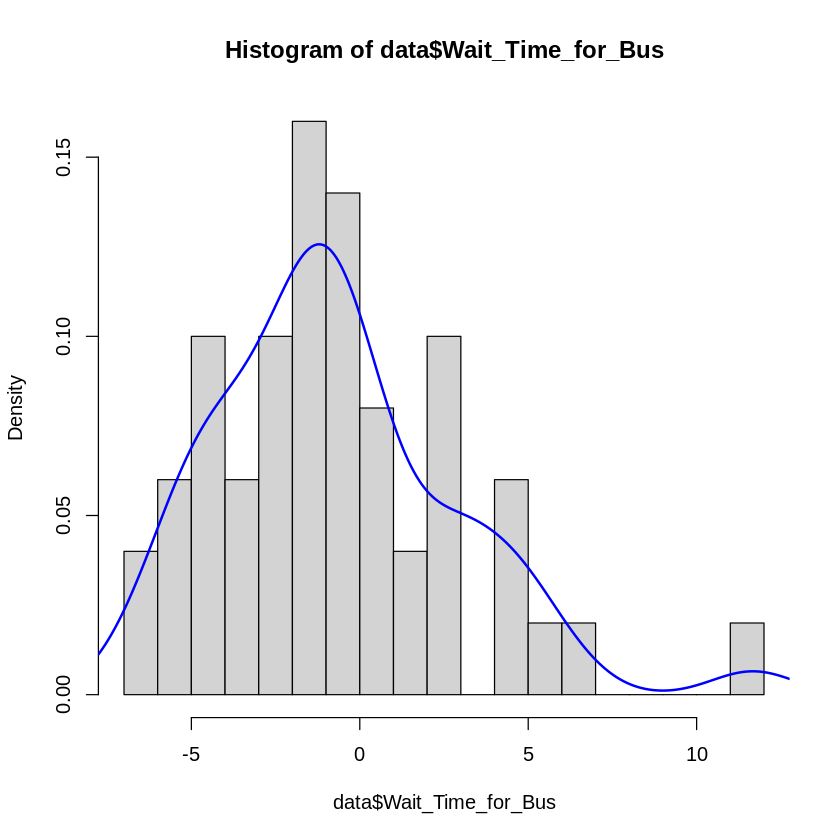

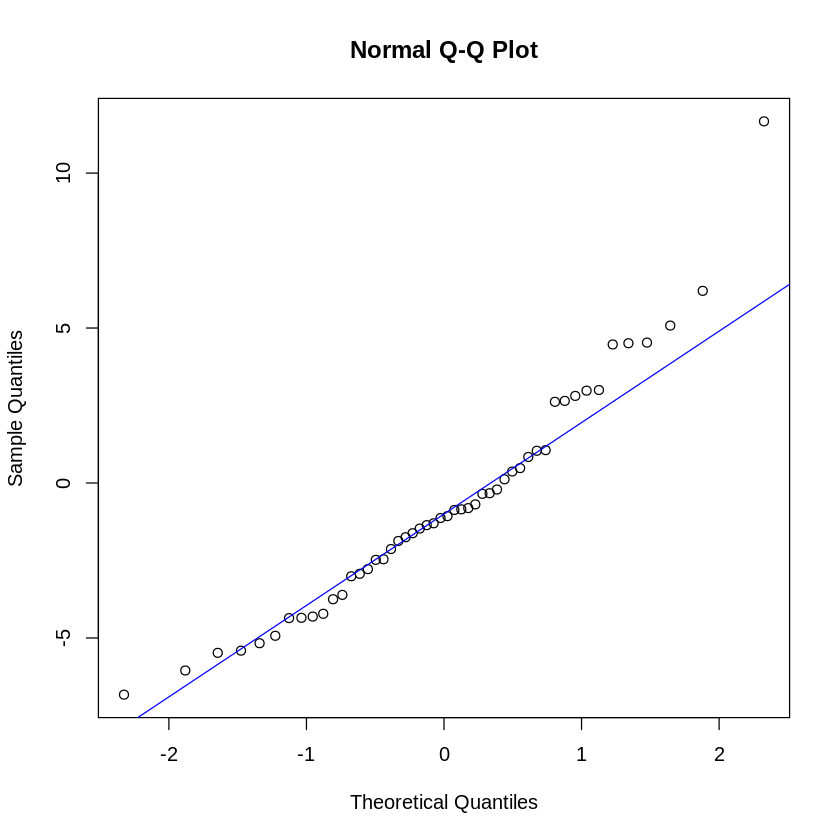

In [22]:
#Q13
#Checking for normality

hist(data$Wait_Time_for_Bus,freq = F,breaks = 15)
lines(density(data$Wait_Time_for_Bus),col = "blue",lwd = 2)

qqnorm(data$Wait_Time_for_Bus)
qqline(data$Wait_Time_for_Bus,col="blue")

In [23]:
#shapiro test
shapiro.test(data$Wait_Time_for_Bus)
cat("----------------------------------------")
# Skewness and Kurtosis test
jarque.test(data$Time_On_Line)
cat("----------------------------------------")
#Anscombe-Glynn test
anscombe.test(data$Time_On_Line)


	Shapiro-Wilk normality test

data:  data$Wait_Time_for_Bus
W = 0.94992, p-value = 0.03387


----------------------------------------


	Jarque-Bera Normality Test

data:  data$Time_On_Line
JB = 0.095754, p-value = 0.9533
alternative hypothesis: greater


----------------------------------------


	Anscombe-Glynn kurtosis test

data:  data$Time_On_Line
kurt = 2.83100, z = 0.12428, p-value = 0.9011
alternative hypothesis: kurtosis is not equal to 3


In [24]:
# p-value in Shapiro-Wilk normality test  < 0.05 --> normal distribution --> F

In [25]:
CBus=data$Wait_Time_for_Bus
CBus

[1] -4.36 -3.75 -1.75 -1.13 -1.36 -2.78  6.20 -0.35 -6.83  4.53  0.84  0.37
[13]  2.98 -4.35 -1.62 11.67 -0.69 -2.13 -0.33 -2.93 -2.48  1.06  5.08 -4.22
[25]  4.47 -3.01  2.62 -1.47  0.48 -2.46 -5.41 -1.87 -5.17 -4.31 -0.81 -1.07
[37] -3.61 -6.05 -5.48  3.00  0.12  1.04 -4.93 -0.85  2.81 -1.30 -0.21 -0.87
[49]  4.51  2.65

In [26]:
CBus_trans=CBus+10
CBus_trans=log(CBus_trans)
CBus_trans

[1] 1.729884 1.832581 2.110213 2.182675 2.156403 1.976855 2.785011 2.266958
 [9] 1.153732 2.676215 2.383243 2.338917 2.563410 1.731656 2.125848 3.075929
[17] 2.231089 2.063058 2.269028 1.955860 2.017566 2.403335 2.713369 1.754404
[25] 2.672078 1.944481 2.535283 2.143589 2.349469 2.020222 1.523880 2.095561
[33] 1.574846 1.738710 2.218116 2.189416 1.854734 1.373716 1.508512 2.564949
[41] 2.314514 2.401525 1.623341 2.213754 2.550226 2.163323 2.281361 2.211566
[49] 2.674838 2.537657

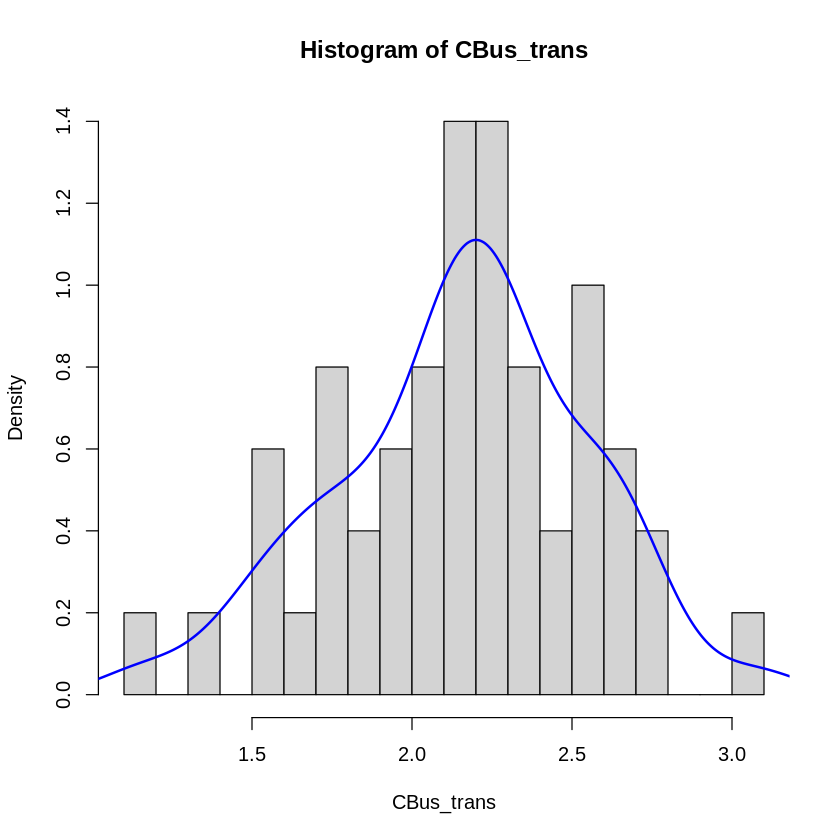

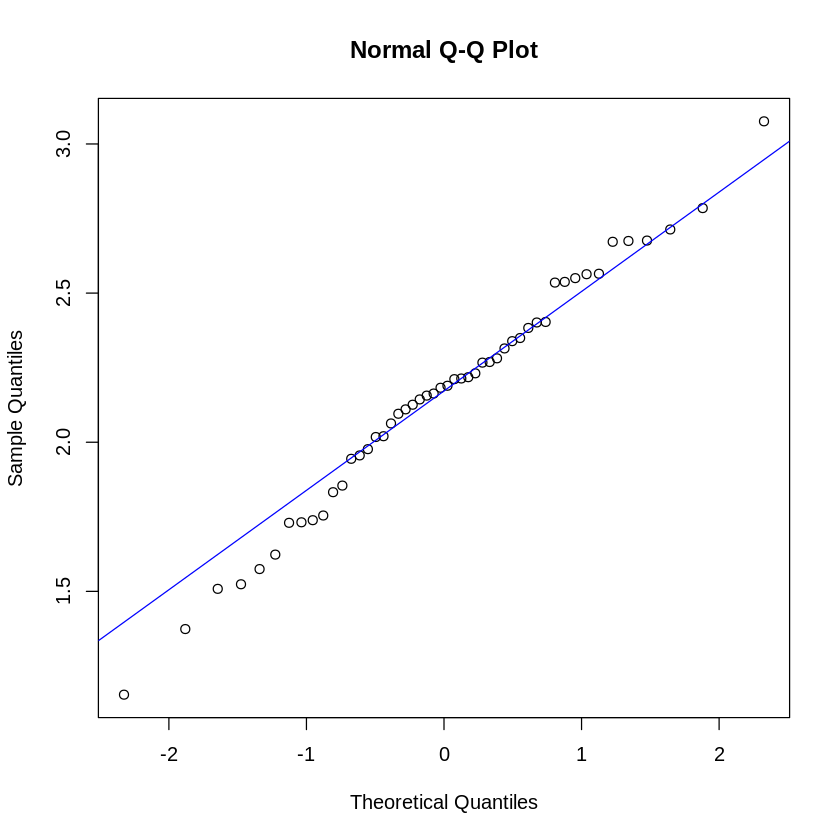

In [27]:
#Checking for normality

hist(CBus_trans,freq = F,breaks = 15)
lines(density(CBus_trans),col = "blue",lwd = 2)

qqnorm(CBus_trans)
qqline(CBus_trans,col="blue")

In [28]:
#shapiro test
shapiro.test(CBus_trans)
cat("----------------------------------------")
# Skewness and Kurtosis test
jarque.test(CBus_trans)
cat("----------------------------------------")
#Anscombe-Glynn test
anscombe.test(CBus_trans)


	Shapiro-Wilk normality test

data:  CBus_trans
W = 0.98814, p-value = 0.8935


----------------------------------------


	Jarque-Bera Normality Test

data:  CBus_trans
JB = 0.52775, p-value = 0.7681
alternative hypothesis: greater


----------------------------------------


	Anscombe-Glynn kurtosis test

data:  CBus_trans
kurt = 2.93832, z = 0.31746, p-value = 0.7509
alternative hypothesis: kurtosis is not equal to 3


In [29]:
# p-value in all of tests  > 0.05 --> normal distribution --> T

In [30]:
#Q12
cat("percentage of people who waits more than 15 min for bus = ",
    round(pnorm(log(15), mean(CBus_trans), sd(CBus_trans),lower.tail = FALSE)*100,4),"%")

percentage of people who waits more than 15 min for bus =  8.0096 %

In [31]:
#Q14

#point estimation of mean
mean_g=mean(data$Gas_To_Fill)
cat("point estimation =",round(mean_g,4),"\n")

#interval estimation of Mean with Unkown variance
#confidence interval=0.95
n14=length(data$Gas_To_Fill)
sd_g=sd(data$Gas_To_Fill)
alpha=0.05
t14=qt(alpha/2,n14-1)

lower_mean14 = mean_g - (abs(t14) * sd_t / sqrt(n14))
upper_mean14 = mean_g + (abs(t14) * sd_t / sqrt(n14))

cat("interval estimation =","[",round(lower_mean14,4),",",round(upper_mean14,4),"]")

point estimation = 18.52 
interval estimation = [ 17.7614 , 19.2786 ]

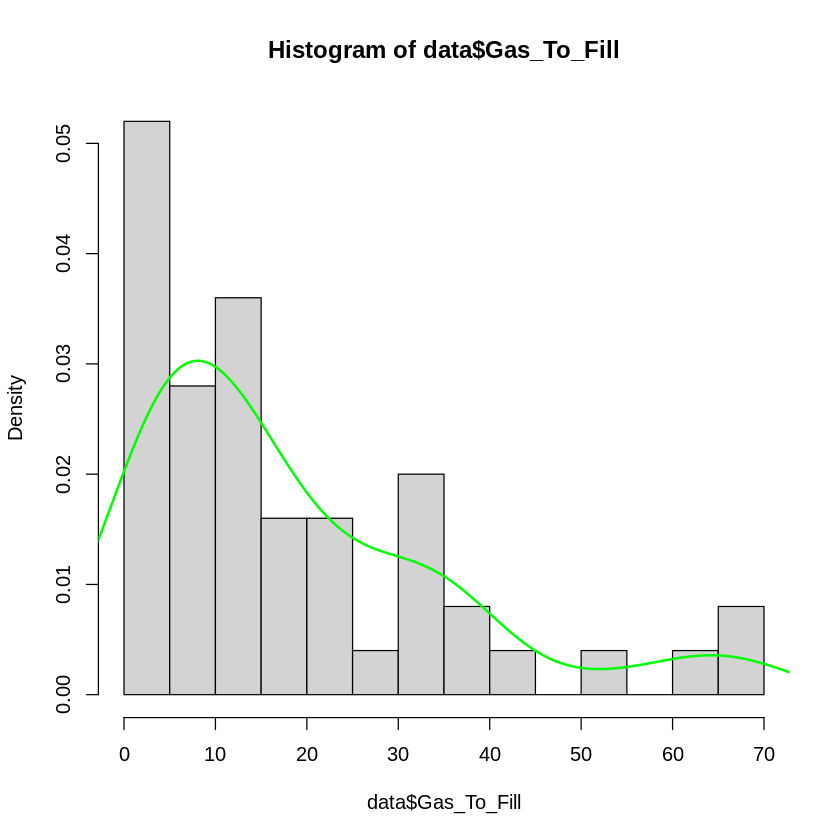

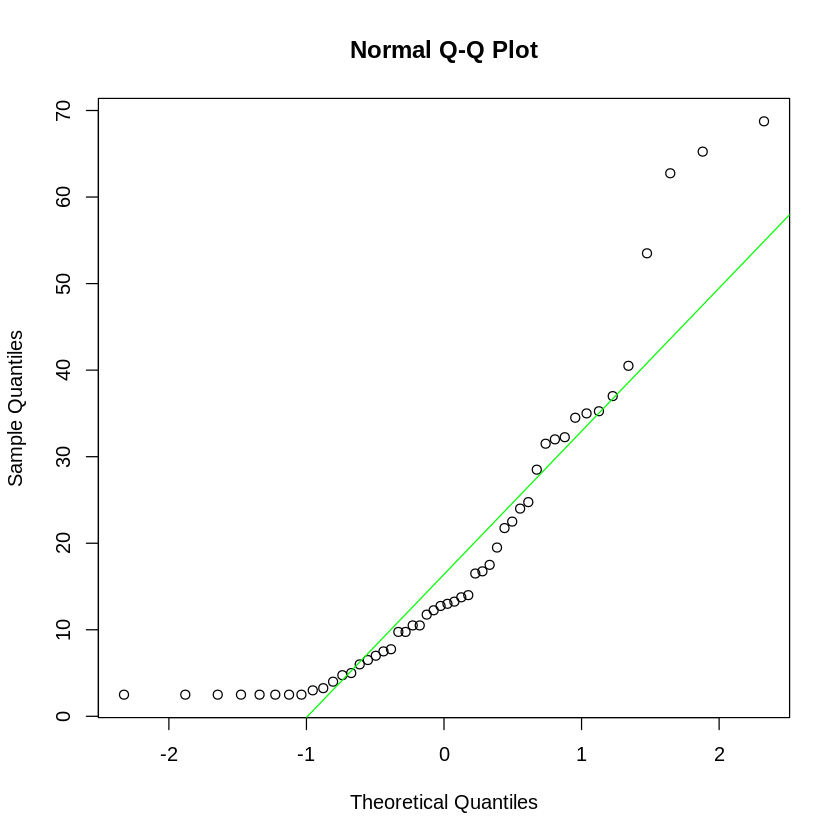

In [32]:
#Q15

#Checking for normality

hist(data$Gas_To_Fill,freq = F,breaks = 15)
lines(density(data$Gas_To_Fill),col = "green",lwd = 2)

qqnorm(data$Gas_To_Fill)
qqline(data$Gas_To_Fill,col="green")

In [33]:
# checking normal dist

#shapiro test
shapiro.test(data$Gas_To_Fil)
cat("----------------------------------------")
# Skewness and Kurtosis test
jarque.test(data$Gas_To_Fil)
cat("----------------------------------------")
#Anscombe-Glynn test
anscombe.test(data$Gas_To_Fil)


	Shapiro-Wilk normality test

data:  data$Gas_To_Fil
W = 0.83419, p-value = 5.932e-06


----------------------------------------


	Jarque-Bera Normality Test

data:  data$Gas_To_Fil
JB = 18.683, p-value = 8.773e-05
alternative hypothesis: greater


----------------------------------------


	Anscombe-Glynn kurtosis test

data:  data$Gas_To_Fil
kurt = 4.2560, z = 1.8711, p-value = 0.06133
alternative hypothesis: kurtosis is not equal to 3


In [34]:
# checking exponential dist

install.packages("exptest")
library("exptest")

shapiro.exp.test(data$Gas_To_Fil)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Shapiro-Wilk test for exponentiality

data:  data$Gas_To_Fil
W = 0.018005, p-value = 0.251


In [35]:
# p-value in all of tests  > 0.05 --> exponential distribution --> T

In [36]:
cat("percentage of cars which need >=40L gas = ",
    round(pexp(40,rate=1/mean(data$Gas_To_Fil),lower.tail = F)*100,4),"%")

percentage of cars which need >=40L gas =  11.5345 %

In [39]:
#Q16
p16=pexp(40,rate=1/mean(data$Gas_To_Fil),lower.tail = F)
cat("P(X=2) =",round(dgeom(2, 1-p16),4))

P(X=2) = 0.0118